In [13]:
import numpy as np
import math
import matplotlib.pyplot as plt
import random

#open the file
datapath='/Users/rachellee/Desktop/research/references/'
filename='flux_table_70um.txt'
data=np.loadtxt(datapath+filename)

#number is coloumn 0, flux is column 25
number=data[:,0]
flux=data[:,25]

In [14]:
#remove zeros in the flux
flux_new=[]
for i in range(len(flux)):
    if flux[i]!=0:
        flux_new.append(flux[i])

In [15]:
def bursts(full_time,size,probability):
    cluster_flux=[]
    star=[]
    cluster_size=size
    for i in range(cluster_size):
        cluster_flux.append(random.choice(flux_new))
        star.append(i)
    cluster_mag=[]
    for i in range(len(cluster_flux)):
        mag=-2.5*np.log10(cluster_flux[i])
        cluster_mag.append(mag)
    #make multi dimensional array for burst prob 
    #let 1 be unburst and NaN be burst
    t=full_time #yrs
    cadence=2
    steps=t*cadence
    burst_prob=probability/cadence
    burst=np.ones((cluster_size,steps))
    L=np.zeros((cluster_size,steps))
    burst_fraction=[]
    cluster_new=[]
    cluster_old=[]
    star_new=[]
    star_old=[]
    bursts=0
    for i in range(steps):
        for j in range(cluster_size):
            if burst[j,i]==1:
                prob=random.random()
                if prob>burst_prob:
                    burst[j,i]=burst[j,i]
                    L[j,i]=cluster_mag[j]
                if prob<=burst_prob:
                    burst[j,i:200+i]=np.nan
                    L[j,i]=cluster_mag[j]-5
                    cluster_new.append(cluster_mag[j]-5)
                    cluster_old.append(cluster_mag[j])
                    star_new.append(star[j])
                    star_old.append(star[j])
    #determine total number of bursts 
    total=0
    burst_total=[]
    for i in range(steps):
        for j in range(cluster_size):
            if np.isnan(burst[j,i])==True and burst[j,i-1]==1:
                    total+=1
        burst_total.append(total)
    #find the fraction at a time
    burst_fraction=[]
    fraction_val=0
    for i in range(steps):
        for j in range(cluster_size):
            if np.isnan(burst[j,i])==True:
                fraction_val+=1
        burst_fraction.append(fraction_val)
        fraction_val=0
    fraction=[]
    for i in range(len(burst_fraction)):
        fraction.append(burst_fraction[i]/cluster_size)
        
    return burst_total,burst_fraction,fraction

In [24]:
run=2
cluster_size=2000
t=300
cadence=2
steps=t*cadence
prob=1e-4

In [25]:
#empty total lists
burst_total2m=[]
burst_total2l=[]
burst_total10m=[]
burst_total10l=[]
burst_total=[]

#empty number lists
burst_fraction2m=[]
burst_fraction2l=[]
burst_fraction10m=[]
burst_fraction10l=[]
burst_fraction=[]

#empty fraction lists
fraction2m=[]
fraction2l=[]
fraction10m=[]
fraction10l=[]
fraction=[]


for i in range(run):
    values2m=bursts(t,cluster_size,prob*2)
    burst_total2m.append(values2m[0])
    burst_fraction2m.append(values2m[1])
    fraction2m.append(values2m[2])
    values2l=bursts(t,cluster_size,prob/2)
    burst_total2l.append(values2l[0])
    burst_fraction2l.append(values2l[1])
    fraction2l.append(values2l[2])
    values10m=bursts(t,cluster_size,prob*10)
    burst_total10m.append(values10m[0])
    burst_fraction10m.append(values10m[1])
    fraction10m.append(values10m[2])
    values10l=bursts(t,cluster_size,prob/10)
    burst_total10l.append(values10l[0])
    burst_fraction10l.append(values10l[1])
    fraction10l.append(values10l[2])
    values=bursts(t,cluster_size,prob)
    burst_total.append(values[0])
    burst_fraction.append(values[1])
    fraction.append(values[2])

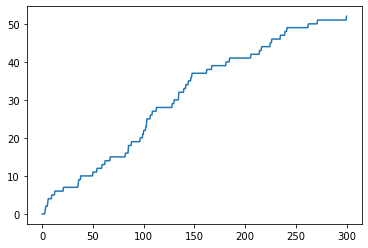

In [26]:
#plot total number vs time
time=np.linspace(0,t,steps)
plt.plot(time,burst_total[0])

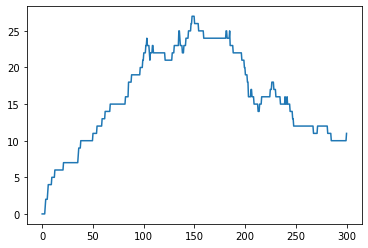

In [27]:
#plot number at a time vs time
plt.plot(time,burst_fraction[0])

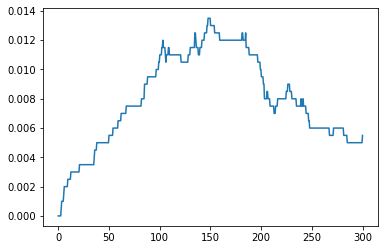

In [28]:
#plot fraction at a time vs time
plt.plot(time,fraction[0])

In [29]:
#calculate the mean of each time step
t_list_years=[200,220,220.5,221,221.5,222,222.5,223,223.5,224,224.5,225]
t_list_cadence=[int(i*2) for i in t_list_years]

In [30]:
cadence_frac_bursts2m=[]
cadence_frac_bursts2l=[]
cadence_frac_bursts10m=[]
cadence_frac_bursts10l=[]
cadence_frac_bursts=[]
for i in range(0,1):
    for j in t_list_cadence:
        cadence_frac_bursts2m.append(fraction2m[i][j])
        cadence_frac_bursts2l.append(fraction2l[i][j])
        cadence_frac_bursts10m.append(fraction10m[i][j])
        cadence_frac_bursts10l.append(fraction10l[i][j])
        cadence_frac_bursts.append(fraction[i][j])

In [31]:
#find mean and std of each star cluster at the cadence times
mean_frac2m=np.mean(cadence_frac_bursts2m)
std_frac2m=np.std(cadence_frac_bursts2m)
mean_frac2l=np.mean(cadence_frac_bursts2l)
std_frac2l=np.std(cadence_frac_bursts2l)
mean_frac10m=np.mean(cadence_frac_bursts10m)
std_frac10m=np.std(cadence_frac_bursts10m)
mean_frac10l=np.mean(cadence_frac_bursts10l)
std_frac10l=np.std(cadence_frac_bursts10l)
mean_frac1=np.mean(cadence_frac_bursts)
std_frac1=np.std(cadence_frac_bursts)

#put them in a list
mean_frac=[mean_frac10l,mean_frac2l,mean_frac1,mean_frac2m,mean_frac10m]
std_frac=[std_frac10l,std_frac2l,std_frac1,std_frac2m,std_frac10m]
probs=[0.1,0.5,1,2,10]

Text(0.5, 1.0, 'Mean Fraction of Stars with Burst for Different Burst Probabilities')

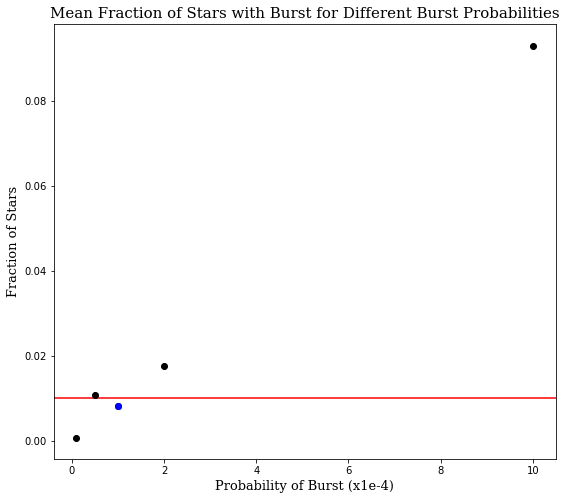

In [32]:
fig,ax=plt.subplots()
fig.set_size_inches(9,8)
x=[1]
ax.errorbar(probs,mean_frac,yerr=std_frac,fmt='o',color='black')
ax.errorbar(x,mean_frac1,yerr=std_frac1,fmt='o',color='blue')
#ax.text(1,0.005,'Our Guess',font='serif',fontsize=12,color='blue')
ax.axhline(0.01,color='red')
ax.set_xlabel('Probability of Burst (x1e-4)',font='serif',fontsize=13)
ax.set_ylabel('Fraction of Stars',font='serif',fontsize=13)
ax.set_title('Mean Fraction of Stars with Burst for Different Burst Probabilities',font='serif',fontsize=15)